<a href="https://colab.research.google.com/github/ghadaalhabib/Machine-Leanring-Projects/blob/main/MNIST_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification Problem

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Data Preprocessing

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

### Define the neural network model


#### Option 1: Fully-connected layer

In [ ]:
# Reshape images to be flattened arrays
# We flattened the input array in order to convert the 2D input images into 1D arrays that can be fed into a fully connected neural network

train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(256, activation="relu", input_shape=(28 * 28,)),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

#### Option 2: Convolutional Neural Network

In [ ]:
# Incase the fully-connected layer was used previously used (meaning the input data was flattened to a 1D vector): we need to reshape the input data to 2D images in the form of image arrays 
# and add an extra dimension to the input data
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [ ]:
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

### Compile the model with categorical cross entropy as the loss function


In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

### Train the model on the training data


### Without a validation set:

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=10)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

### Add a validation set:

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
# Train the model on the training set and validate on the validation set
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2284 - accuracy: 0.9314 - val_loss: 0.1340 - val_accuracy: 0.9592
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0930 - accuracy: 0.9715 - val_loss: 0.0932 - val_accuracy: 0.9724
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0627 - accuracy: 0.9796 - val_loss: 0.0965 - val_accuracy: 0.9729
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0801 - val_accuracy: 0.9774
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0361 - accuracy: 0.9880 - val_loss: 0.0994 - val_accuracy: 0.9747
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0917 - val_accuracy: 0.9753
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0273 - accuracy: 0.9910 - val_loss: 0.1085 - val_accura

### Plot Training & Validation Loss

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Plot 20 random images with label from the training set and see if the model predicts the images correctly by color coding wrong predictions with red and right predictions with green.

1/1 [==============================] - 0s 93ms/step


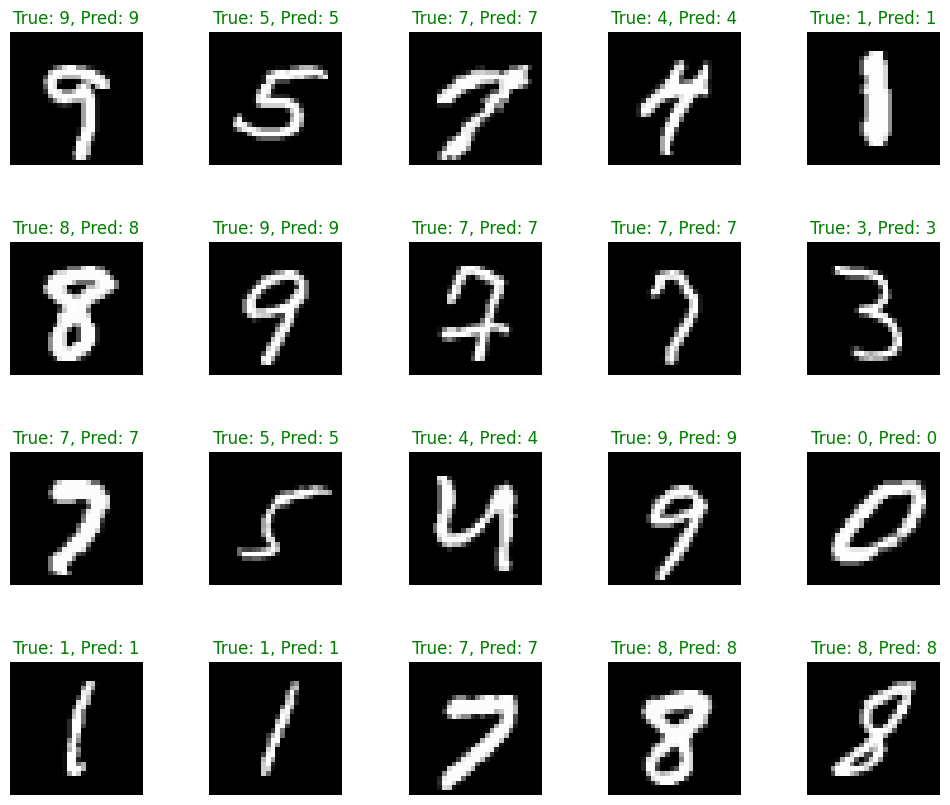

In [ ]:
# Select 20 random images from the training set
sample_indices = np.random.choice(len(train_images), size=20, replace=False)
sample_images = train_images[sample_indices]
sample_labels = train_labels[sample_indices]

# Get the model's predictions for the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the sample images with their true and predicted labels
fig, axs = plt.subplots(4, 5, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs = axs.ravel()

for i in range(20):
    axs[i].imshow(sample_images[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f'True: {np.argmax(sample_labels[i])}, Pred: {predicted_labels[i]}', color='g' if np.argmax(sample_labels[i]) == predicted_labels[i] else 'r')
    axs[i].axis('off')

plt.show()